# 分类器+词向量+TfIdf
- 时间复杂度：低
- 空间复杂度：低

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_word2vec_tfidf import load_xy
from b_metrics import metric, Timer
%matplotlib inline
import numpy as np

## 数据加载、预处理

In [2]:
X_train, X_test, y_train, y_test = load_xy(1)
X_train = [np.mean(x, axis=0) for x in X_train]
X_test = [np.mean(x, axis=0) for x in X_test]

## 评估函数

In [3]:
def metrics(clf):
    t = Timer()  # 计时器
    y_pred = clf().fit(X_train, y_train).predict(X_test)
    metric(y_test, y_pred)

### 逻辑回归

                precision    recall  f1-score   support

          car_       0.94      0.94      0.94       373
    education_       0.83      0.86      0.84       370
entertainment_       0.79      0.86      0.82       383
      fashion_       0.81      0.80      0.80       390
      finance_       0.83      0.80      0.82       414
     military_       0.83      0.81      0.82       411
     politics_       0.66      0.65      0.66       379
      science_       0.79      0.79      0.79       386
       sports_       0.97      0.95      0.96       398

     micro avg       0.83      0.83      0.83      3504
     macro avg       0.83      0.83      0.83      3504
  weighted avg       0.83      0.83      0.83      3504



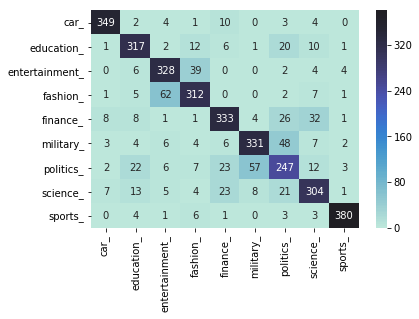

0.60分钟


In [4]:
from sklearn.linear_model import LogisticRegression
metrics(LogisticRegression)

### 支持向量机

                precision    recall  f1-score   support

          car_       0.96      0.91      0.94       373
    education_       0.88      0.86      0.87       370
entertainment_       0.80      0.84      0.82       383
      fashion_       0.85      0.80      0.83       390
      finance_       0.87      0.80      0.84       414
     military_       0.86      0.86      0.86       411
     politics_       0.63      0.76      0.69       379
      science_       0.83      0.83      0.83       386
       sports_       0.98      0.95      0.96       398

     micro avg       0.85      0.85      0.85      3504
     macro avg       0.85      0.85      0.85      3504
  weighted avg       0.85      0.85      0.85      3504



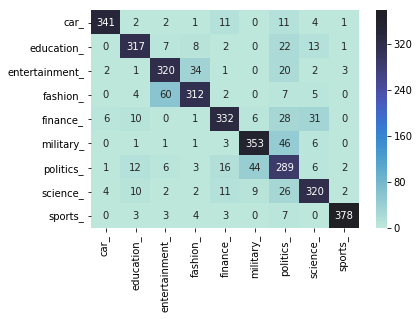

0.51分钟


In [5]:
from sklearn.svm import SVC  # Support Vector Machine
metrics(SVC)

### 决策树

                precision    recall  f1-score   support

          car_       0.89      0.86      0.87       373
    education_       0.74      0.76      0.75       370
entertainment_       0.69      0.73      0.71       383
      fashion_       0.72      0.67      0.70       390
      finance_       0.74      0.71      0.73       414
     military_       0.76      0.74      0.75       411
     politics_       0.58      0.64      0.61       379
      science_       0.65      0.68      0.66       386
       sports_       0.94      0.92      0.93       398

     micro avg       0.74      0.74      0.74      3504
     macro avg       0.75      0.74      0.75      3504
  weighted avg       0.75      0.74      0.75      3504



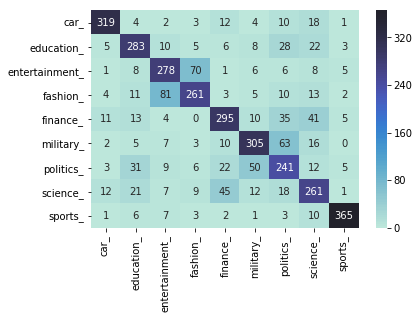

0.07分钟


In [6]:
from sklearn.tree import DecisionTreeClassifier
metrics(DecisionTreeClassifier)

### 随机森林

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
t = Timer()  # 计时器
model = RandomForestClassifier()  # 随机森林分类器
param = {'min_samples_split': [2, 3], 'max_depth': [3, 4, None]}  # 组合参数
clf = GridSearchCV(model, param).fit(X_train, y_train)  # 交叉验证
clf.best_params_

{'max_depth': None, 'min_samples_split': 2}

                precision    recall  f1-score   support

          car_       0.95      0.91      0.93       373
    education_       0.78      0.88      0.82       370
entertainment_       0.77      0.83      0.79       383
      fashion_       0.81      0.79      0.80       390
      finance_       0.83      0.80      0.81       414
     military_       0.83      0.84      0.83       411
     politics_       0.68      0.65      0.67       379
      science_       0.80      0.77      0.78       386
       sports_       0.97      0.93      0.95       398

     micro avg       0.82      0.82      0.82      3504
     macro avg       0.82      0.82      0.82      3504
  weighted avg       0.82      0.82      0.82      3504



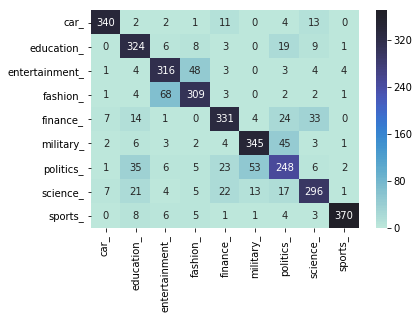

0.23分钟


In [8]:
y_pred = clf.predict(X_test)
metric(y_test, y_pred)
del t

### 贝叶斯

In [9]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # 贝叶斯不能有负数（ValueError: Input X must be non-negative）
X_train = [sigmoid(x) for x in X_train]
X_test = [sigmoid(x) for x in X_test]

                precision    recall  f1-score   support

          car_       0.95      0.81      0.87       373
    education_       0.80      0.81      0.80       370
entertainment_       0.69      0.87      0.77       383
      fashion_       0.78      0.71      0.74       390
      finance_       0.76      0.74      0.75       414
     military_       0.79      0.76      0.77       411
     politics_       0.58      0.62      0.60       379
      science_       0.68      0.67      0.68       386
       sports_       0.98      0.92      0.95       398

     micro avg       0.77      0.77      0.77      3504
     macro avg       0.78      0.77      0.77      3504
  weighted avg       0.78      0.77      0.77      3504



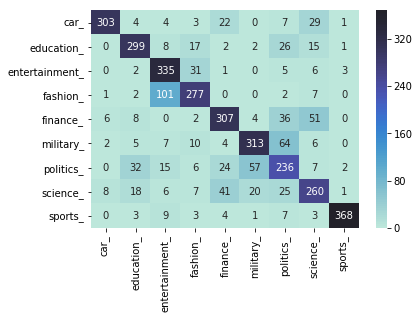

0.01分钟


In [10]:
from sklearn.naive_bayes import MultinomialNB
metrics(MultinomialNB)